In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os

train_data_dir = '../dataset/train/images'
test_data_dir = '../dataset/test/images'
verification_image_dir = '../dataset/verification'
model_filename = 'dog_classifier.h5'
weights_filename = 'model.weights.h5'

# Preparing Dataset

In [ ]:
# Bildgrößen und Batchgröße
img_size = (224, 224)
batch_size = 32

# Daten-Generatoren mit Augmentation für das Training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisierung
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Trainingsdaten laden
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testdaten laden
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 659 images belonging to 5 classes.
Found 220 images belonging to 5 classes.


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.2459 - loss: 2.0887 - val_accuracy: 0.2864 - val_loss: 1.5803
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.2707 - loss: 1.5854 - val_accuracy: 0.4136 - val_loss: 1.4693
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.3233 - loss: 1.5481 - val_accuracy: 0.3591 - val_loss: 1.5072
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.3455 - loss: 1.5096 - val_accuracy: 0.4091 - val_loss: 1.4310
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.3742 - loss: 1.4329 - val_accuracy: 0.3864 - val_loss: 1.3941
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.3844 - loss: 1.4028 - val_accuracy: 0.4818 - val_loss: 1.3346
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.4362 - loss: 1.3961 - val_accuracy: 0.4364 - val_loss: 1.3898
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.4234 - loss: 1.3919 - val_accuracy: 0.

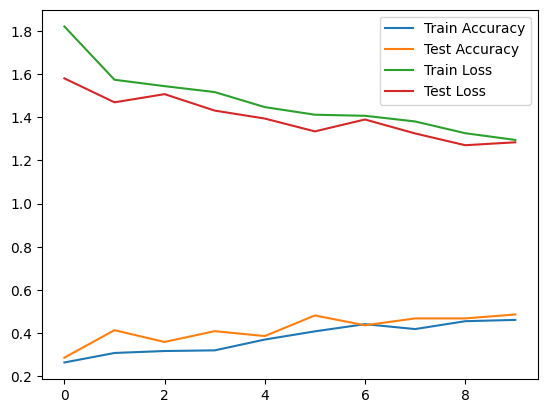

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Number of classes
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)

model.save_weights(weights_filename)
model.save(model_filename) 

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()


# Performancetest des Modells

I0000 00:00:1733251187.011328  243728 service.cc:148] XLA service 0x7fe7f40032d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733251187.011345  243728 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-03 19:39:47.016855: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733251187.045487  243728 cuda_dnn.cc:529] Loaded cuDNN version 90300


Model loaded successfully!
Class labels: {0: 'Chihuahua', 1: 'Maltese Dog', 2: 'Komondor', 3: 'German Shepherd', 4: 'African Hunting Dog'}
Found 15 test images.
Testing image: ../dataset/verification/n02105505_2037.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


I0000 00:00:1733251187.456527  243728 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


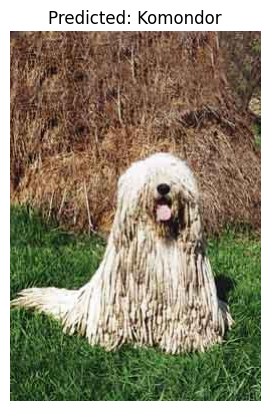

Predicted Label: Komondor
Testing image: ../dataset/verification/n02105505_2101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


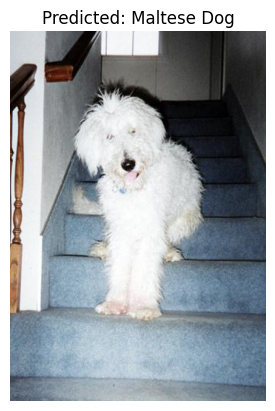

Predicted Label: Maltese Dog
Testing image: ../dataset/verification/n02105505_2322.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


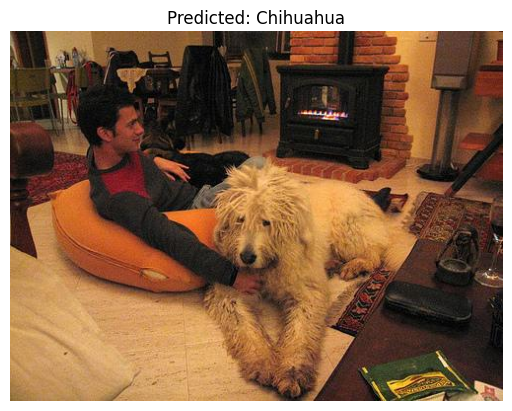

Predicted Label: Chihuahua
Testing image: ../dataset/verification/n02105505_1988.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


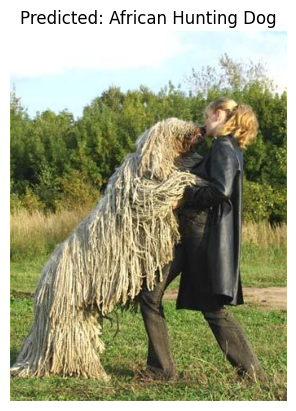

Predicted Label: African Hunting Dog
Testing image: ../dataset/verification/n02105505_2316.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


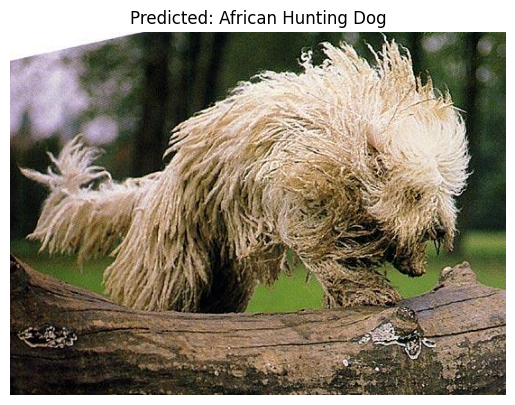

Predicted Label: African Hunting Dog
Testing image: ../dataset/verification/n02105505_2281.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


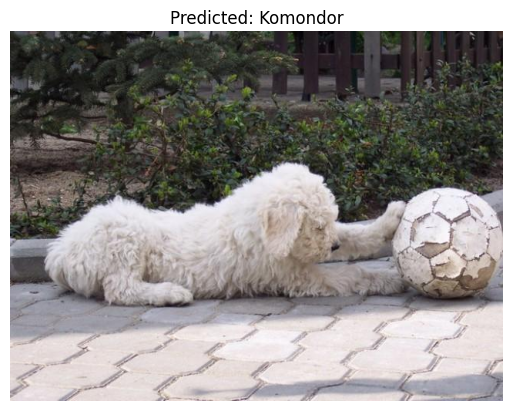

Predicted Label: Komondor
Testing image: ../dataset/verification/n02105505_2069.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


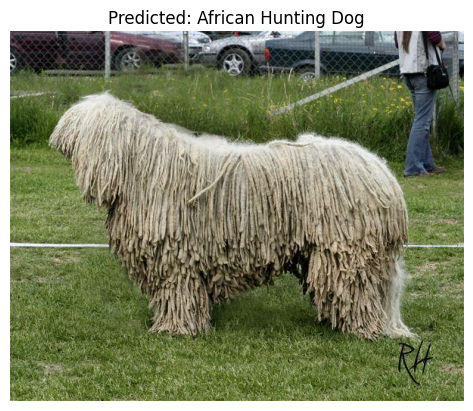

Predicted Label: African Hunting Dog
Testing image: ../dataset/verification/n02105505_2382.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


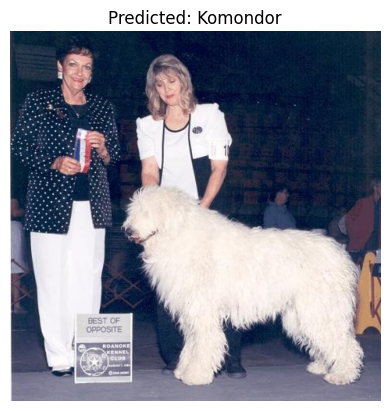

Predicted Label: Komondor
Testing image: ../dataset/verification/n02105505_2043.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


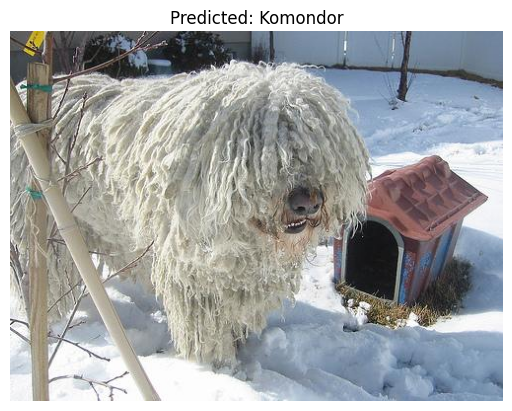

Predicted Label: Komondor
Testing image: ../dataset/verification/n02105505_2083.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


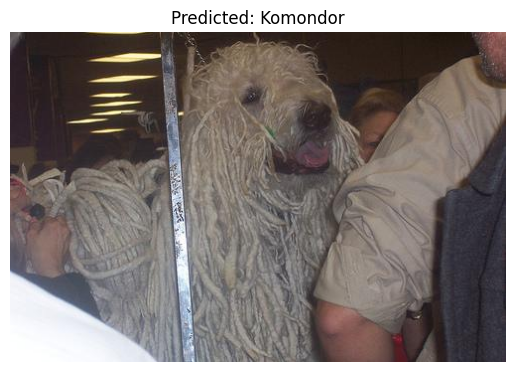

Predicted Label: Komondor
Testing image: ../dataset/verification/n02105505_2155.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


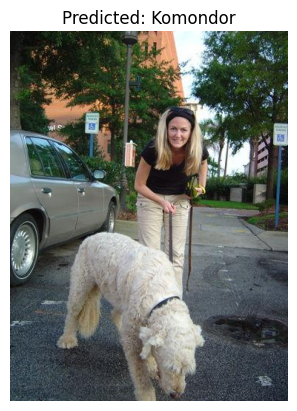

Predicted Label: Komondor
Testing image: ../dataset/verification/n02105505_2178.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


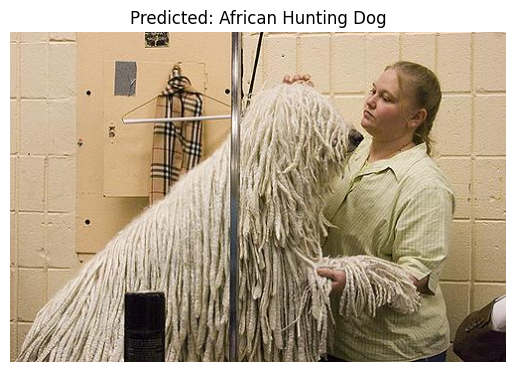

Predicted Label: African Hunting Dog
Testing image: ../dataset/verification/n02105505_2156.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


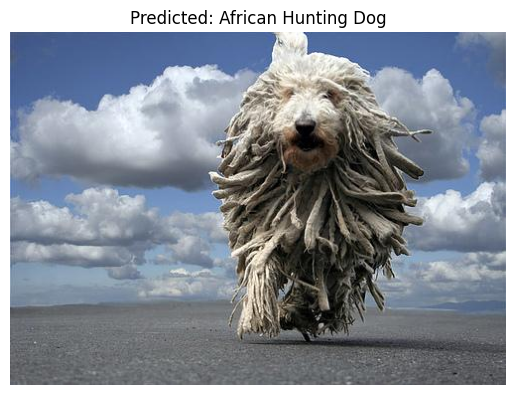

Predicted Label: African Hunting Dog
Testing image: ../dataset/verification/n02105505_2134.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


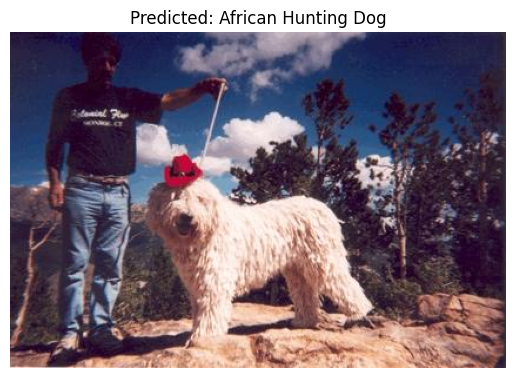

Predicted Label: African Hunting Dog
Testing image: ../dataset/verification/n02105505_2270.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


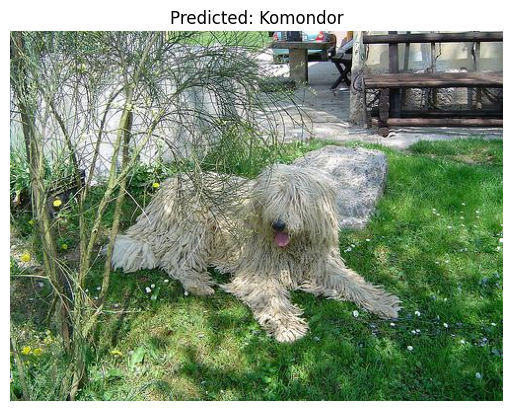

Predicted Label: Komondor


In [9]:
model = load_model(model_filename)
print("Model loaded successfully!")

# Step 2: Define Class Labels
# Ensure these match the class labels used during training
class_labels = {
    0: "Chihuahua",
    1: "Maltese Dog",
    2: "Komondor",
    3: "German Shepherd",
    4: "African Hunting Dog"
}
print("Class labels:", class_labels)

# Step 3: Define Image Preprocessing Function
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess an image for prediction.
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Desired image size (height, width).
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    img = load_img(image_path, target_size=target_size)  # Load and resize the image
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Step 4: Predict Function
def predict_image(image_path):
    """
    Predict the class of an image.
    Args:
        image_path (str): Path to the image file.
    """
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    predicted_label = class_labels[predicted_class]

    # Display the image with its prediction
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()
    print(f"Predicted Label: {predicted_label}")

# Step 5: Test the Model with Example Images
# Update this with the path to your test image directory

test_images = [os.path.join(verification_image_dir, f) for f in os.listdir(verification_image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(test_images)} test images.")
for image_path in test_images:
    print(f"Testing image: {image_path}")
    predict_image(image_path)
